# Lab#1- Jaide Swanson

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (15,10)

In [2]:
stats.norm.cdf(0.8)

0.7881446014166034

In [3]:
stats.norm.cdf(0.56)

0.712260281150973

In [4]:
stats.norm.cdf(0.03)

0.5119664734141126

The cumulative distribution function (cdf) is the probability that a given value will be less than or equal to that in a given distribution. In this case the function acts to integrate the normal distribution to return the probability. 

Above are three tested values, 0.8, 0.56, and 0.03, using the cdf to integrate the normal distribtution. When the results of this integration are compared with the corresponding values in the z table the functions return  probability values that are consistent with this. 

# Lognormal Distribution

In [5]:
s= 0.5
d = stats.lognorm.rvs(s,loc = 3.0, scale = .01, size = 100000)

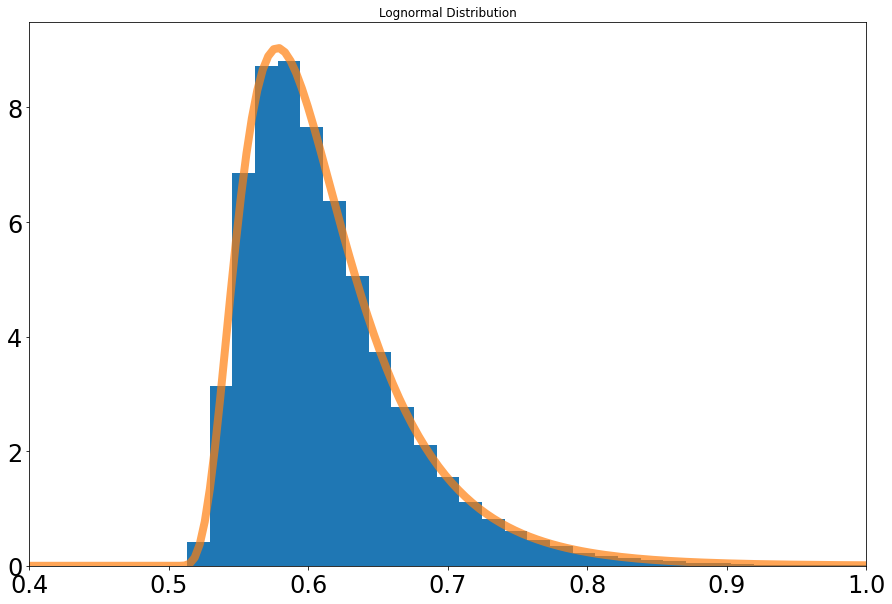

In [29]:
d = stats.lognorm.rvs(s, scale = 0.1, loc=0.5, size = 100000)
fig, ax = plt.subplots(1, 1)
ax.set_title('Lognormal Distribution')
ax.hist(d,50, density=True)
plt.tick_params(labelsize = 24)
plt.xlim([0.4, 1])
x = np.logspace(-3,0,1000)
ax.plot(x, stats.lognorm.pdf(x, s , loc= 0.5, scale = 0.1),linewidth = 8,alpha = 0.7)
plt.show()

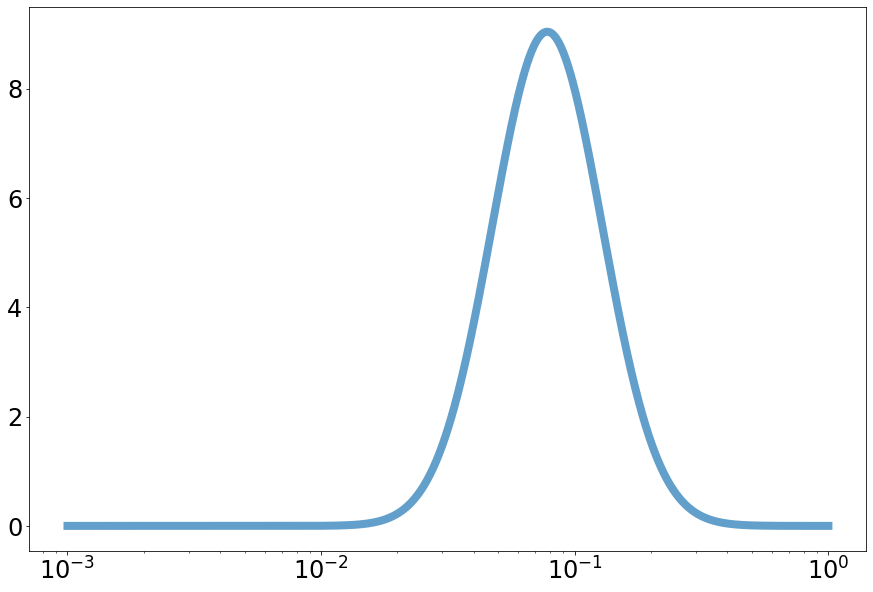

In [31]:
fig, ax = plt.subplots(1, 1)
#ax.hist(d,50, density=True)
plt.tick_params(labelsize = 24)
plt.xscale('log')
x = np.logspace(-3,0,1000)
ax.plot(x, stats.lognorm.pdf(x, s ,scale = 0.1),linewidth = 8,alpha = 0.7)
plt.show()

The first plot is a plotted lognormal distribution. The lognormal is a continuous distribution in which when the logarithm is taken it displays a normal distribution which is demosntrated in the second plot. 

By proposing a hypothetical value of 3.02 the statistical question we want to answer is:

What is the probability that signal free data will produce value that is as or more signal like than our value? Where more signal like is lower values.

This question is answered by integrating the function for the lognormal distribution from negative infinty to this hypothetical value of 0.7.

In [39]:
prob=(stats.lognorm.cdf(0.7, s, loc= 0.5, scale = .1))
prob

0.9171714809983014

The cumulative distribution function returns the probability of getting a value less than the one specified, 0.7, by computing the above mentioned integral. 

In [40]:
norm_prob= stats.norm.ppf(prob, loc = 0.5, scale = .1 )

In [41]:
sigma=(norm_prob- (stats.norm.mean(loc = 0.5, scale = .1)))/(stats.norm.std(loc = 0.5, scale = .1))
sigma

1.3862943611198897

Sigma is based off of the relation of the probability from the lognormal distribution and assocciating it to the normal distribution with this same probability. By taking the point percentile function of our lognormal probablitly value wiht respect to the normal distibution it returns the value that would produce this same probability within a normal distribution. This then can be used to calculate sigma as shown in the cell directly above.

In [42]:
prob2= (stats.lognorm.cdf(0.55, s, loc = 0.5, scale = .1))
norm_prob= stats.norm.ppf(prob2, loc = 0.5, scale = .1 )
sigma=(norm_prob- (stats.norm.mean(loc = 0.5, scale = .1)))/(stats.norm.std(loc = 0.5, scale = .1))
sigma

-1.3862943611198886

In [43]:
prob3= (stats.lognorm.cdf(0.81, s, loc = 0.5, scale = .1))
norm_prob= stats.norm.ppf(prob3, loc = 0.5, scale = .1 )
sigma=(norm_prob- (stats.norm.mean(loc = 0.5, scale = .1)))/(stats.norm.std(loc = 0.5, scale = .1))
sigma

2.2628042229822007

These sigma values are associated with different hypothetical values and change with relation to the mean and where a negative sigma inidcates a location on the left side of the normal distribtution. The probabilites decrease the further right you move away from the mean. 

# Binomial Distribution

In [9]:
from scipy.stats import binom

In [46]:
n= 100
p= 0.5
r = binom.rvs(n,p, loc=0, size = 1000)

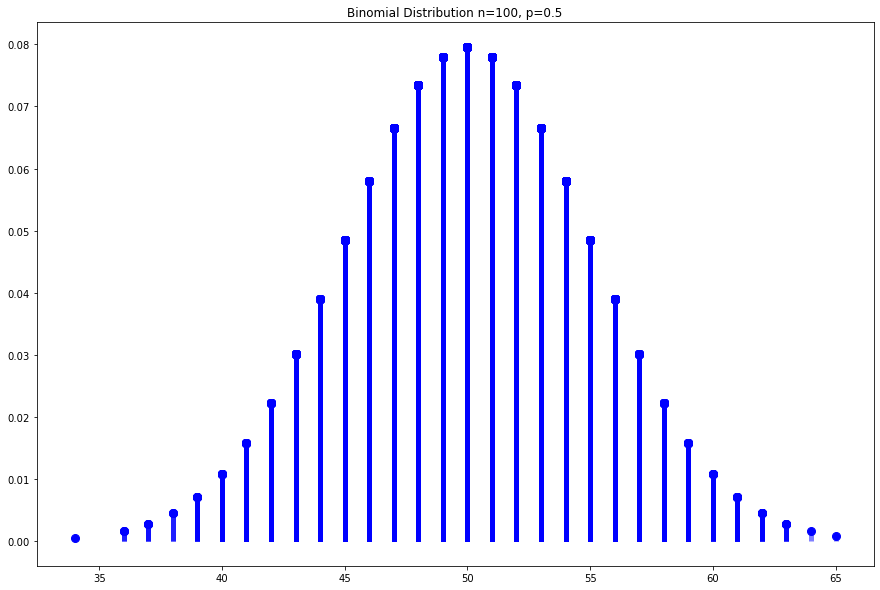

In [61]:
fig, ax = plt.subplots(1, 1)
ax.set_title('Binomial Distribution n=100, p=0.5')
ax.plot(r, binom.pmf(r, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(r, 0, binom.pmf(r, n, p, loc= 0), colors='b', lw=5, alpha=0.5);

The binomial distribution is a discrete distribution that describes the number of successes over a certain number of independent trials n that each ask a yes or no question. A success is defined as answering yes to the particular question. 

In [53]:
prob_binom=(binom.cdf(45, n, p))
prob_binom

0.18410080866334827

By proposing a value of 45 we can determine the probability that answers the question:

What is the probability in 100 trials the data will return successes less than or equal to our proposed value of 45?

Calculating this using the cumulative distribtution function returns the above probability of approximately 18%. 

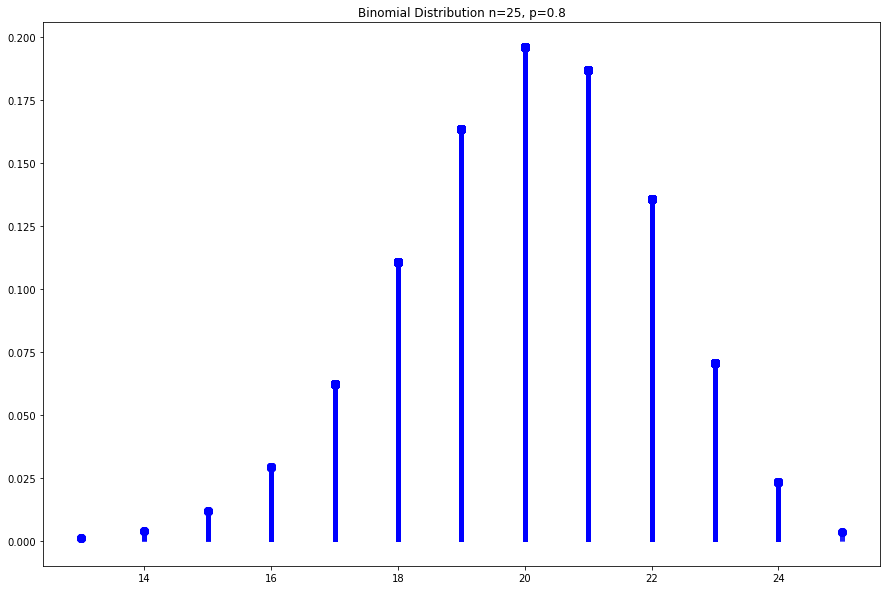

In [60]:
k= binom.rvs(25, 0.8, loc=0, size = 1000)
fig, ax = plt.subplots(1, 1)
ax.set_title('Binomial Distribution n=25, p=0.8')
ax.plot(k, binom.pmf(k, 25, 0.8), 'bo', ms=8, label='binom pmf')
ax.vlines(k, 0, binom.pmf(k, 25, 0.8, loc= 0), colors='b', lw=5, alpha=0.5);

With discrete distributions and discrete values for probability and sigma this implies for experiments certain results that are impossible to obtain. While these are discrete, distribtution parameters are continuous due to data values continuosly changing in these independent trials therefore having values for the mean that might not seem to lone up with the discrete values. 